## Import Libraries

In [1]:
# import Libraries
import pandas as pd
import sweetviz as sv
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import chardet
import datetime as dt

## Import Data

In [2]:
df=pd.read_excel(r"C:\Users\drmat\OneDrive\Documents\Career Foundry\COVID_Suicide\02 Data\02 Prepared\Combined\sex2.xlsx",index_col=False)

## Inspect Dateframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            410 non-null    int64  
 1   state           410 non-null    object 
 2   sex             410 non-null    object 
 3   suicide_deaths  308 non-null    float64
 4   covid_cases     303 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 16.1+ KB


In [4]:
df.head()

,year,state,sex,suicide_deaths,covid_cases
0,2019,Alabama,Female,6.0,NaN
1,2019,Alabama,Male,29.6,NaN
2,2019,Alaska,Female,11.6,NaN
3,2019,Alaska,Male,42.0,NaN
4,2019,Arizona,Female,8.9,NaN


## Create correlation heat map

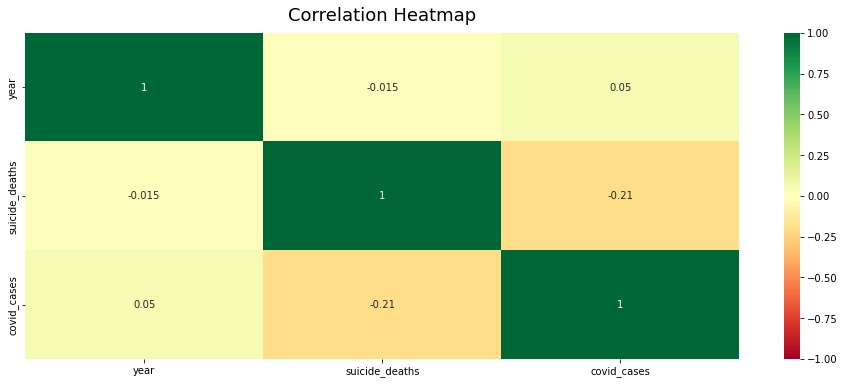

In [5]:
#use seaborn to create correlation heat map
df.corr().round(2)
matrix = df.corr().round(2)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('gender_heatmap.png', dpi=300, bbox_inches='tight')

In [6]:
# create a second dataframe with only overlapping values to see if there is any difference in correlation
values=[2019,2022]
df2=df[df.year.isin(values)==False]

In [7]:
# inspect dataframe
df2.head()

,year,state,sex,suicide_deaths,covid_cases
102,2020,Alabama,Female,7.2,188125.0
103,2020,Alabama,Male,27.9,149248.0
104,2020,Alaska,Female,11.3,21945.0
105,2020,Alaska,Male,38.1,23914.0
106,2020,Arizona,Female,8.0,299552.0


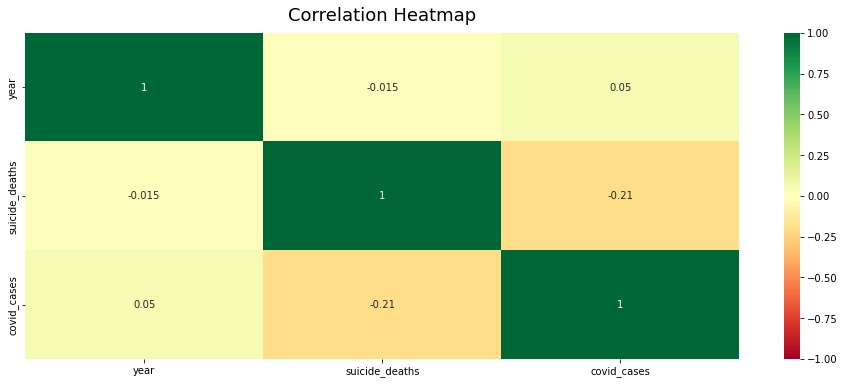

In [8]:
# use seaborn to create correlation heat map of second dataframe
df2.corr().round(2)
matrix = df2.corr().round(2)
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='RdYlGn')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('gender_heatmap2.png', dpi=300, bbox_inches='tight')

### Discuss what the coefficients in the plot mean in terms of the relationships between the variables.
Based on the coeffients there is almost no correlation between the number of covid cases and the number of suidice deaths based on gender. The second dataframe with only overlapping values from 2020 and 2021 does not show any differenece in correlation.

## Create Scatter plot

<AxesSubplot:xlabel='covid_cases', ylabel='suicide_deaths'>

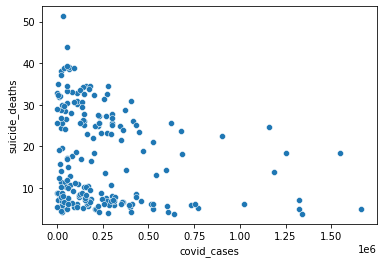

In [9]:
# use seaborn to create scatter plot of main dataframe
sns.scatterplot(x = 'covid_cases', y = 'suicide_deaths',data = df)

<AxesSubplot:xlabel='covid_cases', ylabel='suicide_deaths'>

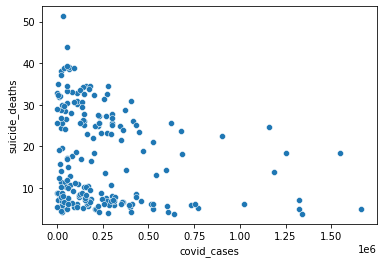

In [10]:
# use seaborn to create scatter plot of secondary dataframe
sns.scatterplot(x = 'covid_cases', y = 'suicide_deaths',data = df2)

### Examine the nature of their relationships based on scatter plots.
Based on the scatter plot the variables (suicide deaths and covid cases) possess a non-linear trend. Theer also still appears to be some outliers in the number of covid cases despite using IQR to filter outliers in previous scripts.

## Create pair plot

In [11]:
# Create a subset for pair plot
sub = df[['covid_cases','suicide_deaths']]

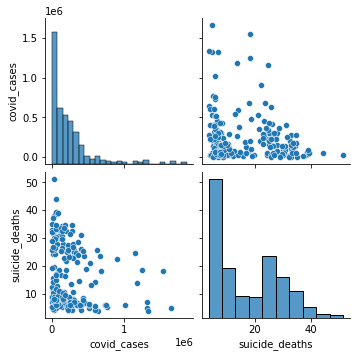

In [12]:
#use seaborn to create pair plot of main dataframe
g=sns.pairplot(sub)

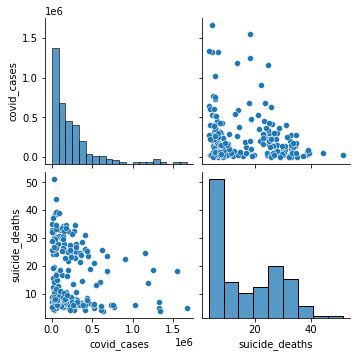

In [13]:
# Create a subset for pair plot from secondary dataframe
sub2 = df2[['covid_cases','suicide_deaths']]
#use seaborn to create pair plot of main dataframe
f=sns.pairplot(sub2)

### Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.
The number of suicide deaths and covid cases appears to be heavily right skewed. This may require further investigation as to why.

# Create categorical plot

In [14]:
#inspect unique values in age_group
df['sex'].value_counts()

Male      205
Female    203
Other       2
Name: sex, dtype: int64

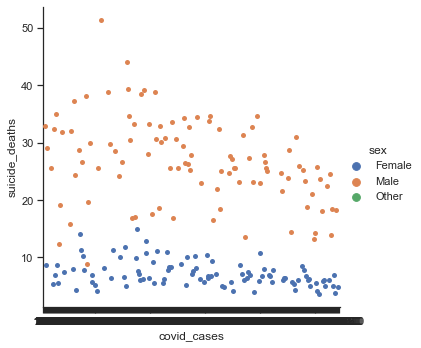

In [15]:
# Create a categorical plot in seaborn using the age groups created 
sns.set(style="ticks")
h = sns.catplot(x="covid_cases", y="suicide_deaths", hue="sex", data=df)

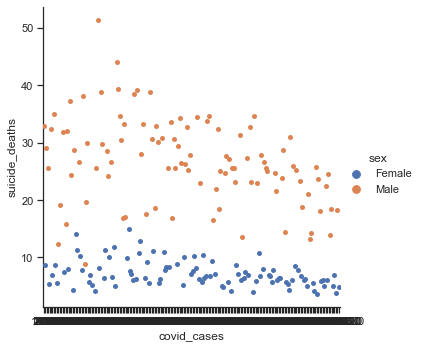

In [16]:
# Create a categorical plot in seaborn using the age groups created 
sns.set(style="ticks")
i = sns.catplot(x="covid_cases", y="suicide_deaths", hue="sex", data=df2)

### Interpret the results of categorical plots.
There seem to be no correlation between covid cases and gender. However, there is a dictinct difference between the number of suicieds based on gender. This is a previously known fact.